In [1]:
import pandas as pd
wolf_data = pd.read_csv("/disk2/ksebestyen/wolf_mean_pool1.csv")
wolf_data

,Unnamed: 0,term,year,embedding,count
0,0,wolf,"(1653, 1654]","[0.5233231, -0.81646746, 0.85729724, 0.0413067...",1.0
1,1,wolf,"(1665, 1666]","[0.99928224, 0.9934263, -0.5384018, 0.04347565...",2.0
2,2,wolf,"(1667, 1668]","[0.15685466, 0.60069555, -0.19705516, -0.53919...",116.0
3,3,wolf,"(1670, 1671]","[-0.35619533, 0.58049935, -0.15371951, 0.13983...",1.0
4,4,wolf,"(1675, 1676]","[0.41724327, 0.48570737, -0.22091796, -0.08992...",168.0
...,...,...,...,...,...
222,222,wolf,"(1988, 1989]","[0.18017472, -0.2833705, 0.43209124, -0.217738...",3.0
223,223,wolf,"(1990, 1991]","[0.41593495, 0.65850264, -0.18228187, -0.42026...",303.0
224,224,wolf,"(1991, 1992]","[0.4636352, 0.47833684, -0.25080362, -0.095138...",17.0
225,225,wolf,"(1999, 2000]","[0.523549, 0.10436953, 0.23631527, -1.209423, ...",1.0


In [2]:
wolf_data["decade"] = wolf_data.year.apply(lambda x: str(x)[1:4] + "0")
wolf_data

,Unnamed: 0,term,year,embedding,count,decade
0,0,wolf,"(1653, 1654]","[0.5233231, -0.81646746, 0.85729724, 0.0413067...",1.0,1650
1,1,wolf,"(1665, 1666]","[0.99928224, 0.9934263, -0.5384018, 0.04347565...",2.0,1660
2,2,wolf,"(1667, 1668]","[0.15685466, 0.60069555, -0.19705516, -0.53919...",116.0,1660
3,3,wolf,"(1670, 1671]","[-0.35619533, 0.58049935, -0.15371951, 0.13983...",1.0,1670
4,4,wolf,"(1675, 1676]","[0.41724327, 0.48570737, -0.22091796, -0.08992...",168.0,1670
...,...,...,...,...,...,...
222,222,wolf,"(1988, 1989]","[0.18017472, -0.2833705, 0.43209124, -0.217738...",3.0,1980
223,223,wolf,"(1990, 1991]","[0.41593495, 0.65850264, -0.18228187, -0.42026...",303.0,1990
224,224,wolf,"(1991, 1992]","[0.4636352, 0.47833684, -0.25080362, -0.095138...",17.0,1990
225,225,wolf,"(1999, 2000]","[0.523549, 0.10436953, 0.23631527, -1.209423, ...",1.0,1990


In [3]:
wolf_data["embedding"] = wolf_data.embedding.apply(lambda x: eval(x))
#wolf_data["embedding"]

import numpy as np

def np_mean(x):
    return np.mean(np.array(x.values.tolist()),axis=0).tolist()

wolf_agg = wolf_data.groupby("decade").agg({'embedding':np_mean, 'count':'sum'}).reset_index()
wolf_agg

,decade,embedding,count
0,1650,"[0.5233231, -0.81646746, 0.85729724, 0.0413067...",1.0
1,1660,"[0.57806845, 0.797060925, -0.36772848, -0.2478...",118.0
2,1670,"[0.16177429666666668, 0.5262846733333334, -0.0...",171.0
3,1680,"[0.5551059025, 0.846703065, -0.260960276500000...",84.0
4,1690,"[0.2613164233333333, 0.790544, -0.179547576666...",63.0
5,1700,"[0.415265135, 0.887302771, -0.0117472233333333...",13.0
6,1710,"[0.5669266266666667, 0.49308869999999994, 0.10...",10.0
7,1720,"[-0.11350929200000001, 0.8186652, -0.307324705...",10.0
8,1730,"[0.0749118133333333, 0.48945687666666665, 0.16...",8.0
9,1740,"[0.49236086250000005, 0.8561092299999999, -0.2...",31.0


In [4]:
docs_per_year = pd.read_csv("/disk2/ksebestyen/extCompDB.csv")
docs_per_year["decade"] = pd.read_csv("/disk2/ksebestyen/extCompDB.csv").Year.apply(lambda x: str(x)[0:3] + "0")

decade_count = docs_per_year.groupby("decade")["decade"].count()

wolf_agg.join(pd.DataFrame(decade_count))

/disk2/ksebestyen/pythonEnvironment/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (83) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ValueError: columns overlap but no suffix specified: Index(['decade'], dtype='object')

In [5]:
wolf_agg.reset_index()

,index,decade,embedding,count
0,0,1650,"[0.5233231, -0.81646746, 0.85729724, 0.0413067...",1.0
1,1,1660,"[0.57806845, 0.797060925, -0.36772848, -0.2478...",118.0
2,2,1670,"[0.16177429666666668, 0.5262846733333334, -0.0...",171.0
3,3,1680,"[0.5551059025, 0.846703065, -0.260960276500000...",84.0
4,4,1690,"[0.2613164233333333, 0.790544, -0.179547576666...",63.0
5,5,1700,"[0.415265135, 0.887302771, -0.0117472233333333...",13.0
6,6,1710,"[0.5669266266666667, 0.49308869999999994, 0.10...",10.0
7,7,1720,"[-0.11350929200000001, 0.8186652, -0.307324705...",10.0
8,8,1730,"[0.0749118133333333, 0.48945687666666665, 0.16...",8.0
9,9,1740,"[0.49236086250000005, 0.8561092299999999, -0.2...",31.0


In [6]:
glob_emb = np.mean(np.array(wolf_agg.embedding.values.tolist()),axis=0)

time_series = []

from sklearn.metrics.pairwise import cosine_similarity


for i in range(1,wolf_agg.shape[0]):
    #time_series.append((wolf_agg.iloc[i].decade,cosine_similarity([glob_emb],[np.mean(np.array(wolf_agg[0:i+1].embedding.values.tolist()),axis=0)]).flatten()[0], wolf_agg.iloc[i]['count']))
    time_series.append((wolf_agg.iloc[i].decade,cosine_similarity([np.mean(np.array(wolf_agg[(i-1):i].embedding.values.tolist()),axis=0)],[np.mean(np.array(wolf_agg[i:i+1].embedding.values.tolist()),axis=0)]).flatten()[0], wolf_agg.iloc[i]['count']))

result = pd.DataFrame(time_series, columns = ['Decade','Cos','Freq'])

In [7]:
result

,Decade,Cos,Freq
0,1660,0.349917,118.0
1,1670,0.822014,171.0
2,1680,0.728663,84.0
3,1690,0.738550,63.0
4,1700,0.624238,13.0
5,1710,0.618846,10.0
6,1720,0.479913,10.0
7,1730,0.526292,8.0
8,1740,0.762403,31.0
9,1750,0.860650,36.0


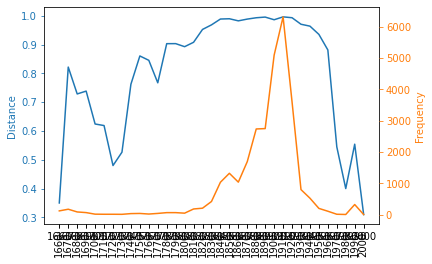

In [8]:
import matplotlib.pyplot as plt



fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.plot(result.Decade, result.Cos, color="C0")
#ax.set_xlabel("Year", color="black")
ax.set_ylabel("Distance", color="C0")
#ax.tick_params(axis='x', colors="C0", )
ax.tick_params(axis='y', colors="C0")

ax2.plot(result.Decade, result.Freq, color="C1")
ax2.yaxis.tick_right()
#ax2.set_xlabel('Year', color="black") 
ax2.set_ylabel('Frequency', color="C1")       
#ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
#ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")
plt.xticks(rotation=90)
plt.show()

#fig=plt.figure()
#plt.close("all")
#plt.figure()
#plt.plot(figsize=(10,6))
#plt.plot(result.Decade, result.Cos, label="Wolf")
#plt.xticks(rotation=90)
#plt.legend()
#plt.show()